# Testing with Kaggle Dataset

Dataset I Used <a href=https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer> fer-2013 <a/>

In [1]:
#import the required modules
import numpy as np
import cv2
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import time

from deepface import DeepFace

file_path = "fer-2013/test"

## Testing deepface

In [2]:
def visualize():
    
    moods = [f for f in listdir(file_path)]
    
    sample_images = []
    
    fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(12, 4), dpi=100)
    
    for idx, mood in enumerate(moods):
        sample = listdir(f"{file_path}/{mood}")[5]
        
        
        img = cv2.imread(f"{file_path}/{mood}/{sample}")
        ax[idx//4, idx%4].imshow(img)
        ax[idx//4, idx%4].set_title(mood)
        
    plt.tight_layout()
    

def read_data(mood):

    path = f"{file_path}/{mood}"
    
    return [f for f in listdir(path) if isfile(join(path, f))]
    

def analyze_deepface(mood, images, detector):
    
    n_img = len(images)
    results = []

    for idx, image in enumerate(images):
        img = cv2.imread(f"{file_path}/{mood}/{image}")

        # storing the result
        result = DeepFace.analyze(img, actions = ['emotion'],
                                  enforce_detection=False, silent=True, detector_backend=detector)
        results.append(result[0]["dominant_emotion"])
        
        if idx%100 == 0:
            print(f"progress: {idx}/{n_img}")

    return results


def accuracy(mood, results):
    
    n = len(results)
    correct = 0
    
    
    for emotion in results:
        
        if mood == emotion:
            correct += 1
            
    
    return correct / n

def report(labels, preds):

    cm = confusion_matrix(test_label,preds)
 
    # Plot the confusion matrix.
    plt.figure(figsize=(6,5), dpi=120)
    sns.heatmap(cm, annot=True,
                xticklabels=moods,
                yticklabels=moods, fmt="g", cmap="Blues")

    plt.title("Confusion Matrix")
    plt.xlabel("Predictions")
    plt.ylabel("True Labels")

    print(classification_report(test_label, preds))
    plt.show()

### Testing for all detectors

In [3]:
backends = [
  'opencv', 
  'mtcnn',
  'mediapipe',
]

# backends = [
#   'opencv', 
#   'ssd', # error
#   'dlib', # error
#   'mtcnn', 
#   'retinaface', # no progress
#   'mediapipe',
#   'yolov8', # wrong backend name error?
#   'yunet', # wrong backend name error?
# ]

moods = [f for f in listdir(file_path)]
mood_mapping = {"angry":"angry", "disgusted":"disgust", "fearful":"fear",
                      "happy":"happy", "neutral":"neutral", "sad":"sad", "surprised":"surprise"}

deepface_scores = {}
deepface_preds = {}
detector_times = {}
test_label = []

for mood in moods:
    images = read_data(mood)
    test_label += [mood_mapping[mood] for _ in range(len(images))]

for detector in backends:
    detector_score = {}
    detector_preds = []
    
    print(f"\n{detector} analyzing!\n".upper())
    
    start = time.time()
    
    for mood in moods:
        print(f"{mood.upper()} emotion")
        
        images = read_data(mood)
        results = analyze_deepface(mood, images, detector)
        detector_preds += results

        score = accuracy(mood_mapping[mood], results)
        detector_score[mood] = score
        
    took = time.time() - start
        
    deepface_scores[detector] = detector_score
    deepface_preds[detector] = detector_preds
    detector_times[detector] = took
    


OPENCV ANALYZING!

ANGRY emotion
progress: 0/958
progress: 100/958
progress: 200/958
progress: 300/958
progress: 400/958
progress: 500/958
progress: 600/958
progress: 700/958
progress: 800/958
progress: 900/958
DISGUSTED emotion
progress: 0/111
progress: 100/111
FEARFUL emotion
progress: 0/1024
progress: 100/1024
progress: 200/1024
progress: 300/1024
progress: 400/1024
progress: 500/1024
progress: 600/1024
progress: 700/1024
progress: 800/1024
progress: 900/1024
progress: 1000/1024
HAPPY emotion
progress: 0/1774
progress: 100/1774
progress: 200/1774
progress: 300/1774
progress: 400/1774
progress: 500/1774
progress: 600/1774
progress: 700/1774
progress: 800/1774
progress: 900/1774
progress: 1000/1774
progress: 1100/1774
progress: 1200/1774
progress: 1300/1774
progress: 1400/1774
progress: 1500/1774
progress: 1600/1774
progress: 1700/1774
NEUTRAL emotion
progress: 0/1233
progress: 100/1233
progress: 200/1233
progress: 300/1233
progress: 400/1233
progress: 500/1233
progress: 600/1233
pro

1/1 [==============================] - 0s 18ms/step
progress: 100/958
1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step
progress: 200/958
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 18ms/step
progress: 300/958
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 22ms/step
progress: 400/958
1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 26ms/step
progress: 500/958
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 32ms/step
progress: 600/958
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step
progress: 700/958
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 23ms/step
progress: 800/958
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step
progress: 900/958
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 25ms/step
DISGUSTED emotion
1/1 [==============================] - 0s 29ms/step
progress: 0/111
1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 33ms/step
progress: 100/111
1/1 [==============================] - 0s 35ms/step
FEARFUL emotion
1/1 [==============================] - 0s 28ms/step
progress: 0/1024
1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 40ms/step
progress: 100/1024
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 30ms/step
progress: 200/1024
1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 48ms/step
progress: 300/1024
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 42ms/step
progress: 400/1024
1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 48ms/step
progress: 500/1024
1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 27ms/step
progress: 600/1024
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 37ms/step
progress: 700/1024
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 38ms/step
progress: 800/1024
1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 39ms/step
progress: 900/1024
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 37ms/step
progress: 1000/1024
1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 29ms/step
HAPPY emotion
1/1 [==============================] - 0s 37ms/step
progress: 0/1774
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step
progress: 100/1774
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 47ms/step
progress: 200/1774
1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 31ms/step
progress: 300/1774
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 62ms/step
progress: 400/1774
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 47ms/step
progress: 500/1774
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 47ms/step
progress: 600/1774
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 62ms/step
progress: 700/1774
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 47ms/step
progress: 800/1774
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 78ms/step
progress: 900/1774
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 47ms/step
progress: 1000/1774
1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 47ms/step
progress: 1100/1774
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 16ms/step
progress: 1200/1774
1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 78ms/step
progress: 1300/1774
1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 62ms/step
progress: 1400/1774
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 51ms/step
progress: 1500/1774
1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 84ms/step
progress: 1600/1774
1/1 [==============================] - 0s 93ms/step


1/1 [==============================] - 0s 106ms/step
progress: 1700/1774
1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 125ms/step
NEUTRAL emotion
1/1 [==============================] - 0s 62ms/step
progress: 0/1233
1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 45ms/step
progress: 100/1233
1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 75ms/step
progress: 200/1233
1/1 [==============================] - 0s 60ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 61ms/step
progress: 300/1233
1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 95ms/step
progress: 400/1233
1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 57ms/step
progress: 500/1233
1/1 [==============================] - 0s 88ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 116ms/step
progress: 600/1233
1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 93ms/step


1/1 [==============================] - 0s 183ms/step
progress: 700/1233
1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 52ms/step
progress: 800/1233
1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 125ms/step
progress: 900/1233
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 39ms/step
progress: 1000/1233
1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 111ms/step
progress: 1100/1233
1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 109ms/step
progress: 1200/1233
1/1 [==============================] - 0s 94ms/step
SAD emotion
1/1 [==============================] - 0s 76ms/step
progress: 0/1247
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 47ms/step
progress: 100/1247
1/1 [==============================] - 0s 75ms/step


1/1 [==============================] - 0s 47ms/step
progress: 200/1247
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 109ms/step
progress: 300/1247
1/1 [==============================] - 0s 94ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 94ms/step
progress: 400/1247
1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 62ms/step
progress: 500/1247
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step
progress: 600/1247
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 125ms/step
progress: 700/1247
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 47ms/step
progress: 800/1247
1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 78ms/step
progress: 900/1247
1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 62ms/step
progress: 1000/1247
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 63ms/step
progress: 1100/1247
1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 62ms/step
progress: 1200/1247
1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 78ms/step
SURPRISED emotion
1/1 [==============================] - 0s 62ms/step
progress: 0/831
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 109ms/step
progress: 100/831
1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 141ms/step
progress: 200/831
1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 78ms/step
progress: 300/831
1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 63ms/step
progress: 400/831
1/1 [==============================] - 0s 156ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 78ms/step
progress: 500/831
1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 172ms/step
progress: 600/831
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 172ms/step
progress: 700/831
1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 125ms/step
progress: 800/831
1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 156ms/step

MEDIAPIPE ANALYZING!

ANGRY emotion
progress: 0/958
progress: 100/958
progress: 200/958
progress: 300/958
progress: 400/958
progress: 500/958
progress: 600/958
progress: 700/958
progress: 800/958
progress: 900/958
DISGUSTED emotion
progress: 0/111
progress: 100/111
FEARFUL emotion
progress: 0/1024
progress: 100/1024
progress: 200/1024
progress: 300/1024
progress: 400/1024
progress: 500/1024
progress: 600/1024
progress: 700/1024
progress: 800/1024
progress: 900/1024
progress: 1000/1024
HAPPY emotion
progress: 0/1774
progress: 100/1774
progress: 200/1774
progress: 300/1774
progress: 400/1774
progress: 500/1774
progress: 600/1774
progress: 700/1774
progress: 800/1774
progress: 900/1774
progress: 1000/1774
progress: 1100/1774
progress: 1200/1774
progress: 1300/1774
progress: 1400/1774
progress: 1500/1774
progress: 1600/1774
progress: 1700/1774
NEUTRAL emotion
progress: 0/1233
progress: 100/1233
progress: 200/1233
progress: 300/1233
prog

### Results

In [4]:
deepface_scores

{'opencv': {'angry': 0.42066805845511485,
  'disgusted': 0.43243243243243246,
  'fearful': 0.4169921875,
  'happy': 0.7604284103720406,
  'neutral': 0.5425790754257908,
  'sad': 0.42181234963913394,
  'surprised': 0.703971119133574},
 'mtcnn': {'angry': 0.3935281837160752,
  'disgusted': 0.3963963963963964,
  'fearful': 0.380859375,
  'happy': 0.7711386696730552,
  'neutral': 0.5085158150851582,
  'sad': 0.40978348035284684,
  'surprised': 0.641395908543923},
 'mediapipe': {'angry': 0.3475991649269311,
  'disgusted': 0.32432432432432434,
  'fearful': 0.376953125,
  'happy': 0.6995490417136415,
  'neutral': 0.4209245742092457,
  'sad': 0.39294306335204493,
  'surprised': 0.5980746089049338}}

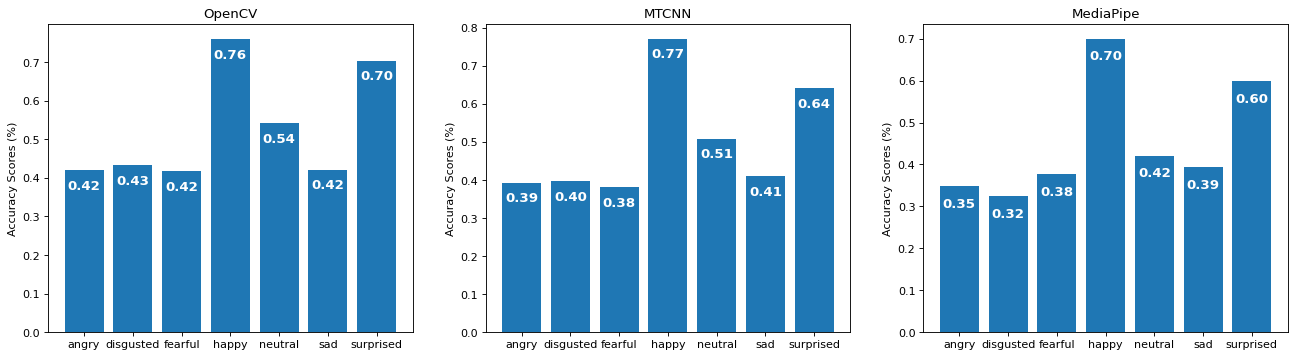

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5), dpi=80)


ax[0].bar(deepface_scores["opencv"].keys(), deepface_scores["opencv"].values())
ax[0].set_title("OpenCV")
ax[0].set_ylabel("Accuracy Scores (%)")

for idx, value in enumerate(deepface_scores["opencv"].values()):
    ax[0].text(idx, value-.05, f"{value:.2f}", fontsize="large", ha="center", weight="bold", color="white")

ax[1].bar(deepface_scores["mtcnn"].keys(), deepface_scores["mtcnn"].values())
ax[1].set_title("MTCNN")
ax[1].set_ylabel("Accuracy Scores (%)")

for idx, value in enumerate(deepface_scores["mtcnn"].values()):
    ax[1].text(idx, value-.05, f"{value:.2f}", fontsize="large", ha="center", weight="bold", color="white")

ax[2].bar(deepface_scores["mediapipe"].keys(), deepface_scores["mediapipe"].values())
ax[2].set_title("MediaPipe")
ax[2].set_ylabel("Accuracy Scores (%)")

for idx, value in enumerate(deepface_scores["mediapipe"].values()):
    ax[2].text(idx, value-.05, f"{value:.2f}", fontsize="large", ha="center", weight="bold", color="white")

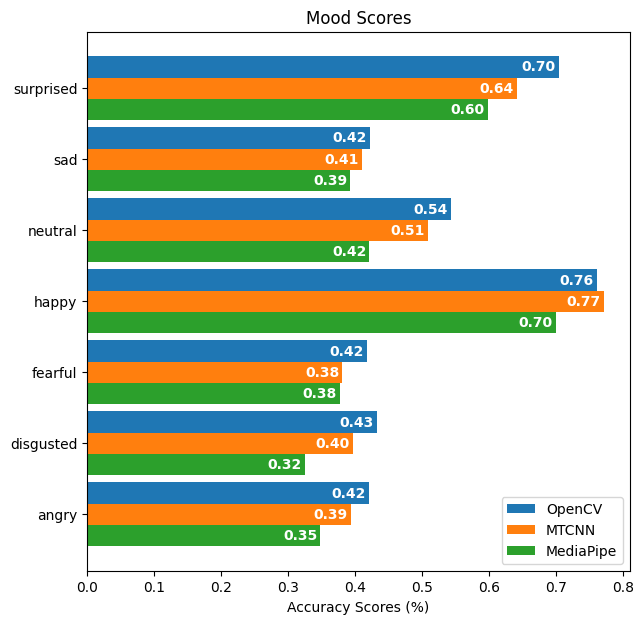

In [106]:
plt.figure(figsize=(7, 7), dpi=100)

height = 0.3

n = len(deepface_scores["opencv"].keys())

plt.barh(np.arange(n) + height, deepface_scores["opencv"].values(), height=height, label="OpenCV")
plt.barh(np.arange(n), deepface_scores["mtcnn"].values(), height=height, label="MTCNN")
plt.barh(np.arange(n) - height, deepface_scores["mediapipe"].values(), height=height, label="MediaPipe")

plt.title("Mood Scores")
plt.yticks(np.arange(n), deepface_scores["opencv"].keys())
plt.xlabel("Accuracy Scores (%)")

# for index, value in enumerate(low_GPA_activity_means):
#     plt.text(value-0.3, index+0.2,round(value,2), ha="right",va="center",color="white",fontsize="large",weight="bold")

for idx, value in enumerate(deepface_scores["opencv"].values()):
    plt.text(value - 0.03, idx + height, f"{value:.2f}", ha="center", va="center", weight="bold", color="white")
    
for idx, value in enumerate(deepface_scores["mtcnn"].values()):
    plt.text(value - 0.03, idx, f"{value:.2f}", ha="center", va="center", weight="bold", color="white")
    
for idx, value in enumerate(deepface_scores["mediapipe"].values()):
    plt.text(value - 0.03, idx - height, f"{value:.2f}", ha="center", va="center", weight="bold", color="white")
    
plt.legend()
    
plt.show();

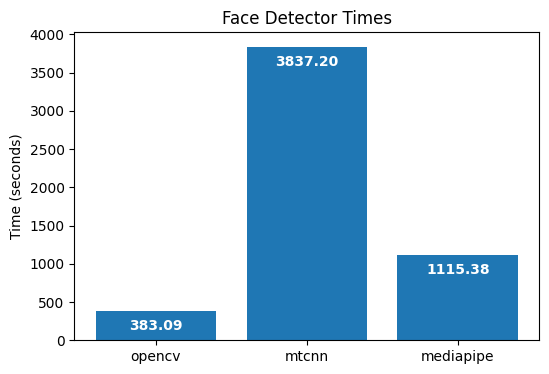

In [123]:
plt.figure(figsize=(6,4))

plt.bar(detector_times.keys(), detector_times.values())

plt.title("Face Detector Times")
plt.ylabel("Time (seconds)")

for idx, value in enumerate(detector_times.values()):
    plt.text(idx, value - 200, f"{value:.2f}", ha="center", va="center", weight="bold", color="white")

              precision    recall  f1-score   support

       angry       0.49      0.42      0.45       958
     disgust       0.59      0.43      0.50       111
        fear       0.39      0.42      0.40      1024
       happy       0.77      0.76      0.77      1774
     neutral       0.46      0.54      0.50      1233
         sad       0.43      0.42      0.42      1247
    surprise       0.77      0.70      0.74       831

    accuracy                           0.56      7178
   macro avg       0.56      0.53      0.54      7178
weighted avg       0.56      0.56      0.56      7178



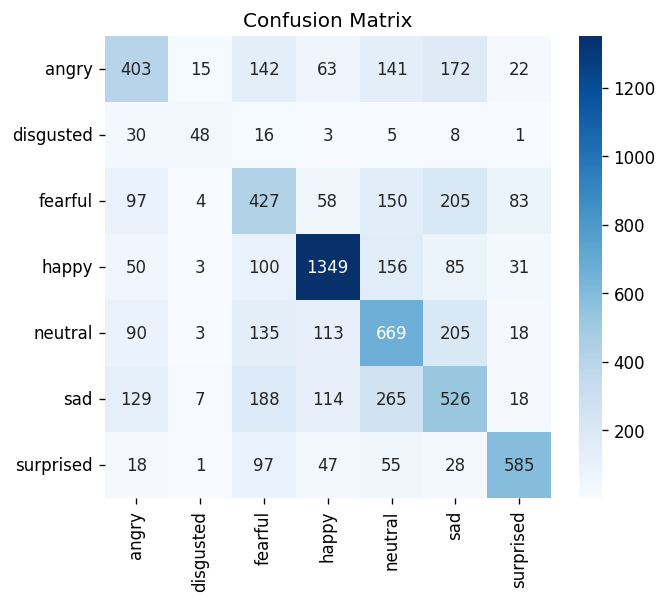

In [125]:
report(test_label, deepface_preds["opencv"])

              precision    recall  f1-score   support

       angry       0.46      0.39      0.42       958
     disgust       0.52      0.40      0.45       111
        fear       0.34      0.38      0.36      1024
       happy       0.76      0.77      0.76      1774
     neutral       0.45      0.51      0.48      1233
         sad       0.43      0.41      0.42      1247
    surprise       0.72      0.64      0.68       831

    accuracy                           0.54      7178
   macro avg       0.53      0.50      0.51      7178
weighted avg       0.54      0.54      0.54      7178



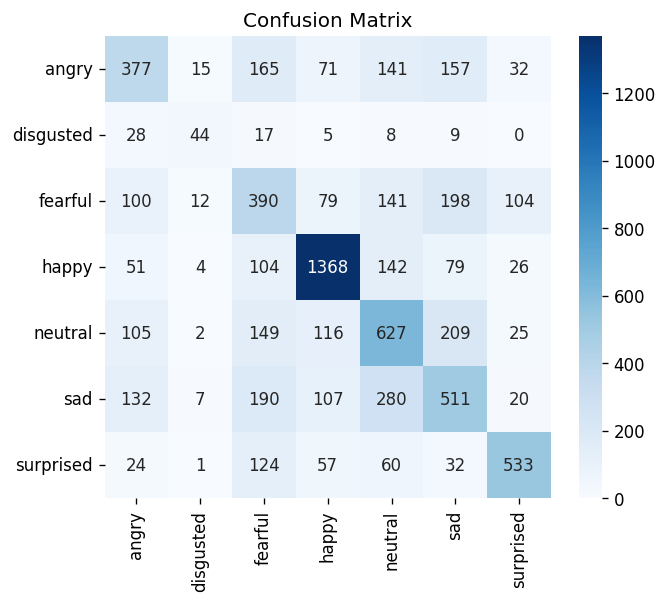

In [126]:
report(test_label, deepface_preds["mtcnn"])

              precision    recall  f1-score   support

       angry       0.42      0.35      0.38       958
     disgust       0.44      0.32      0.37       111
        fear       0.31      0.38      0.34      1024
       happy       0.68      0.70      0.69      1774
     neutral       0.43      0.42      0.43      1233
         sad       0.37      0.39      0.38      1247
    surprise       0.72      0.60      0.65       831

    accuracy                           0.49      7178
   macro avg       0.48      0.45      0.46      7178
weighted avg       0.50      0.49      0.49      7178



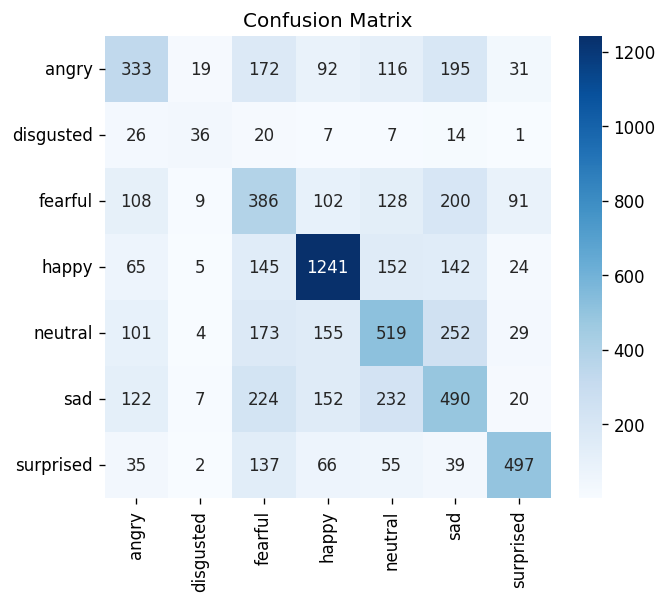

In [127]:
report(test_label, deepface_preds["mediapipe"])